In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [76]:
type(model)

sklearn.linear_model._base.LinearRegression

In [77]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Entire_Home_Apt.csv')
df.head(2)

,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,0,https://www.airbnb.com/rooms/35797,2024-09-25,"Dentro de Villa un estudio de arte con futon, ...",https://www.airbnb.com/users/show/153786,2010-06-28,a few days or more,0%,No contiene host_acceptance_rate,f,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
1,1,https://www.airbnb.com/rooms/44616,2024-09-26,A new concept of hosting in mexico through a b...,https://www.airbnb.com/users/show/196253,2010-08-09,within an hour,100%,93%,t,...,4.70,4.87,4.78,4.98,8.0,4.0,1.0,0.0,0.41,1


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

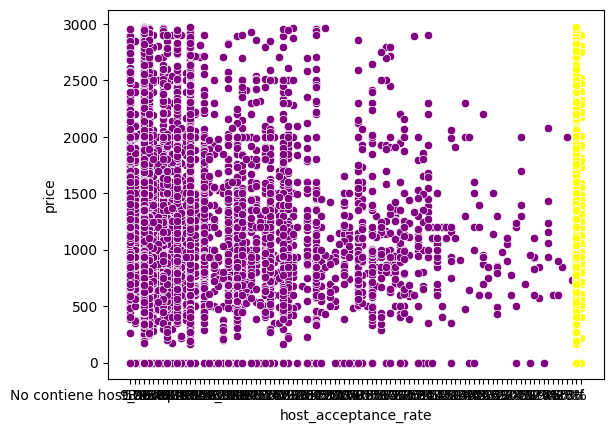

In [78]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='yellow',data=df)

In [79]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [80]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No contiene host_acceptance_rate", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

# Asegurar que las variables independientes sean numéricas
Vars_Indep = df[["host_acceptance_rate"]]  # Agregar otras variables aquí
Var_Dep = df["price"]  # Variable dependiente

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

float64


LinearRegression()

In [81]:
#model.__dict__ se utiliza para ver los atributos del modelo
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([407.0808413]),
 'rank_': 1,
 'singular_': array([41.76768068]),
 'intercept_': np.float64(787.153830444113)}

In [82]:
#Predecimos los valores del total de la variable independiente
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([ 787.15383044, 1165.73901285, 1019.18990998, ...,  787.15383044,
       1194.23467174, 1194.23467174], shape=(17363,))

In [83]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

,Predicciones,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,787.153830,0,https://www.airbnb.com/rooms/35797,2024-09-25,"Dentro de Villa un estudio de arte con futon, ...",https://www.airbnb.com/users/show/153786,2010-06-28,a few days or more,0%,0.00,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
1,1165.739013,1,https://www.airbnb.com/rooms/44616,2024-09-26,A new concept of hosting in mexico through a b...,https://www.airbnb.com/users/show/196253,2010-08-09,within an hour,100%,0.93,...,4.70,4.87,4.78,4.98,8.0,4.0,1.0,0.0,0.41,1
2,1019.189910,2,https://www.airbnb.com/rooms/67703,2024-09-26,"Comfortably furnished, sunny, 2 bedroom apt., ...",https://www.airbnb.com/users/show/334451,2011-01-04,within an hour,71%,0.57,...,4.75,4.94,4.92,4.98,2.0,2.0,0.0,0.0,0.31,1
3,1194.234672,3,https://www.airbnb.com/rooms/70644,2024-09-25,COYOACAN designer studio quiet & safe! well eq...,https://www.airbnb.com/users/show/212109,2010-08-24,within a few hours,100%,1.00,...,4.96,4.96,4.98,4.96,3.0,2.0,1.0,0.0,0.83,1
4,1194.234672,4,https://www.airbnb.com/rooms/107078,2024-09-25,Is the best ever place triple L <br />Location...,https://www.airbnb.com/users/show/540705,2011-04-27,within an hour,100%,1.00,...,5.00,5.00,4.92,4.91,3.0,3.0,0.0,0.0,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17358,787.153830,26572,https://www.airbnb.com/rooms/1251627039124173262,2024-09-25,Have fun with the whole family at this stylish...,https://www.airbnb.com/users/show/653494962,2024-09-22,within an hour,No contiene host_response_rate,0.00,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17359,787.153830,26573,https://www.airbnb.com/rooms/1251642490491185216,2024-09-25,This unique place has its own style. Located i...,https://www.airbnb.com/users/show/652781543,2024-09-18,within an hour,No contiene host_response_rate,0.00,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17360,787.153830,26574,https://www.airbnb.com/rooms/1251769567383709085,2024-09-25,"Apartment with 1 bedroom and queen size bed, k...",https://www.airbnb.com/users/show/376814072,2020-11-24,within an hour,No contiene host_response_rate,0.00,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17361,1194.234672,26575,https://www.airbnb.com/rooms/1251800961446133530,2024-09-26,Discover a refined urban escape in Polanco wit...,https://www.airbnb.com/users/show/237937785,2019-01-20,within an hour,100%,1.00,...,4.76,4.84,4.83,4.85,6.0,6.0,0.0,0.0,1.74,1


In [84]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0415762338794452

In [85]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.20390251072374072)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

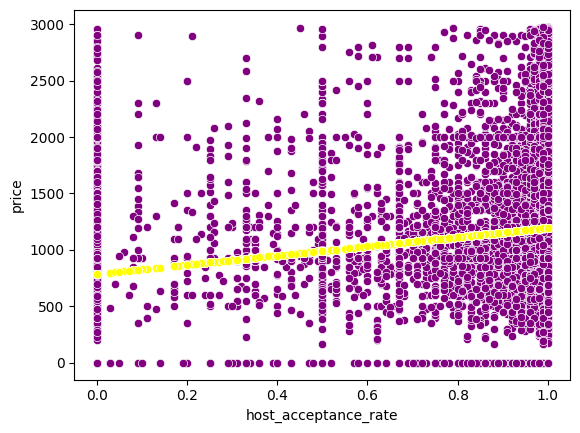

In [86]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='yellow',data = df)

In [87]:
#En esta linea de código se trandforman los valores de las variables categóricas a numéricas
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})

C:\Users\cesar\AppData\Local\Temp\ipykernel_22960\827320779.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})


In [88]:
df['room_type'] = 1

In [89]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]

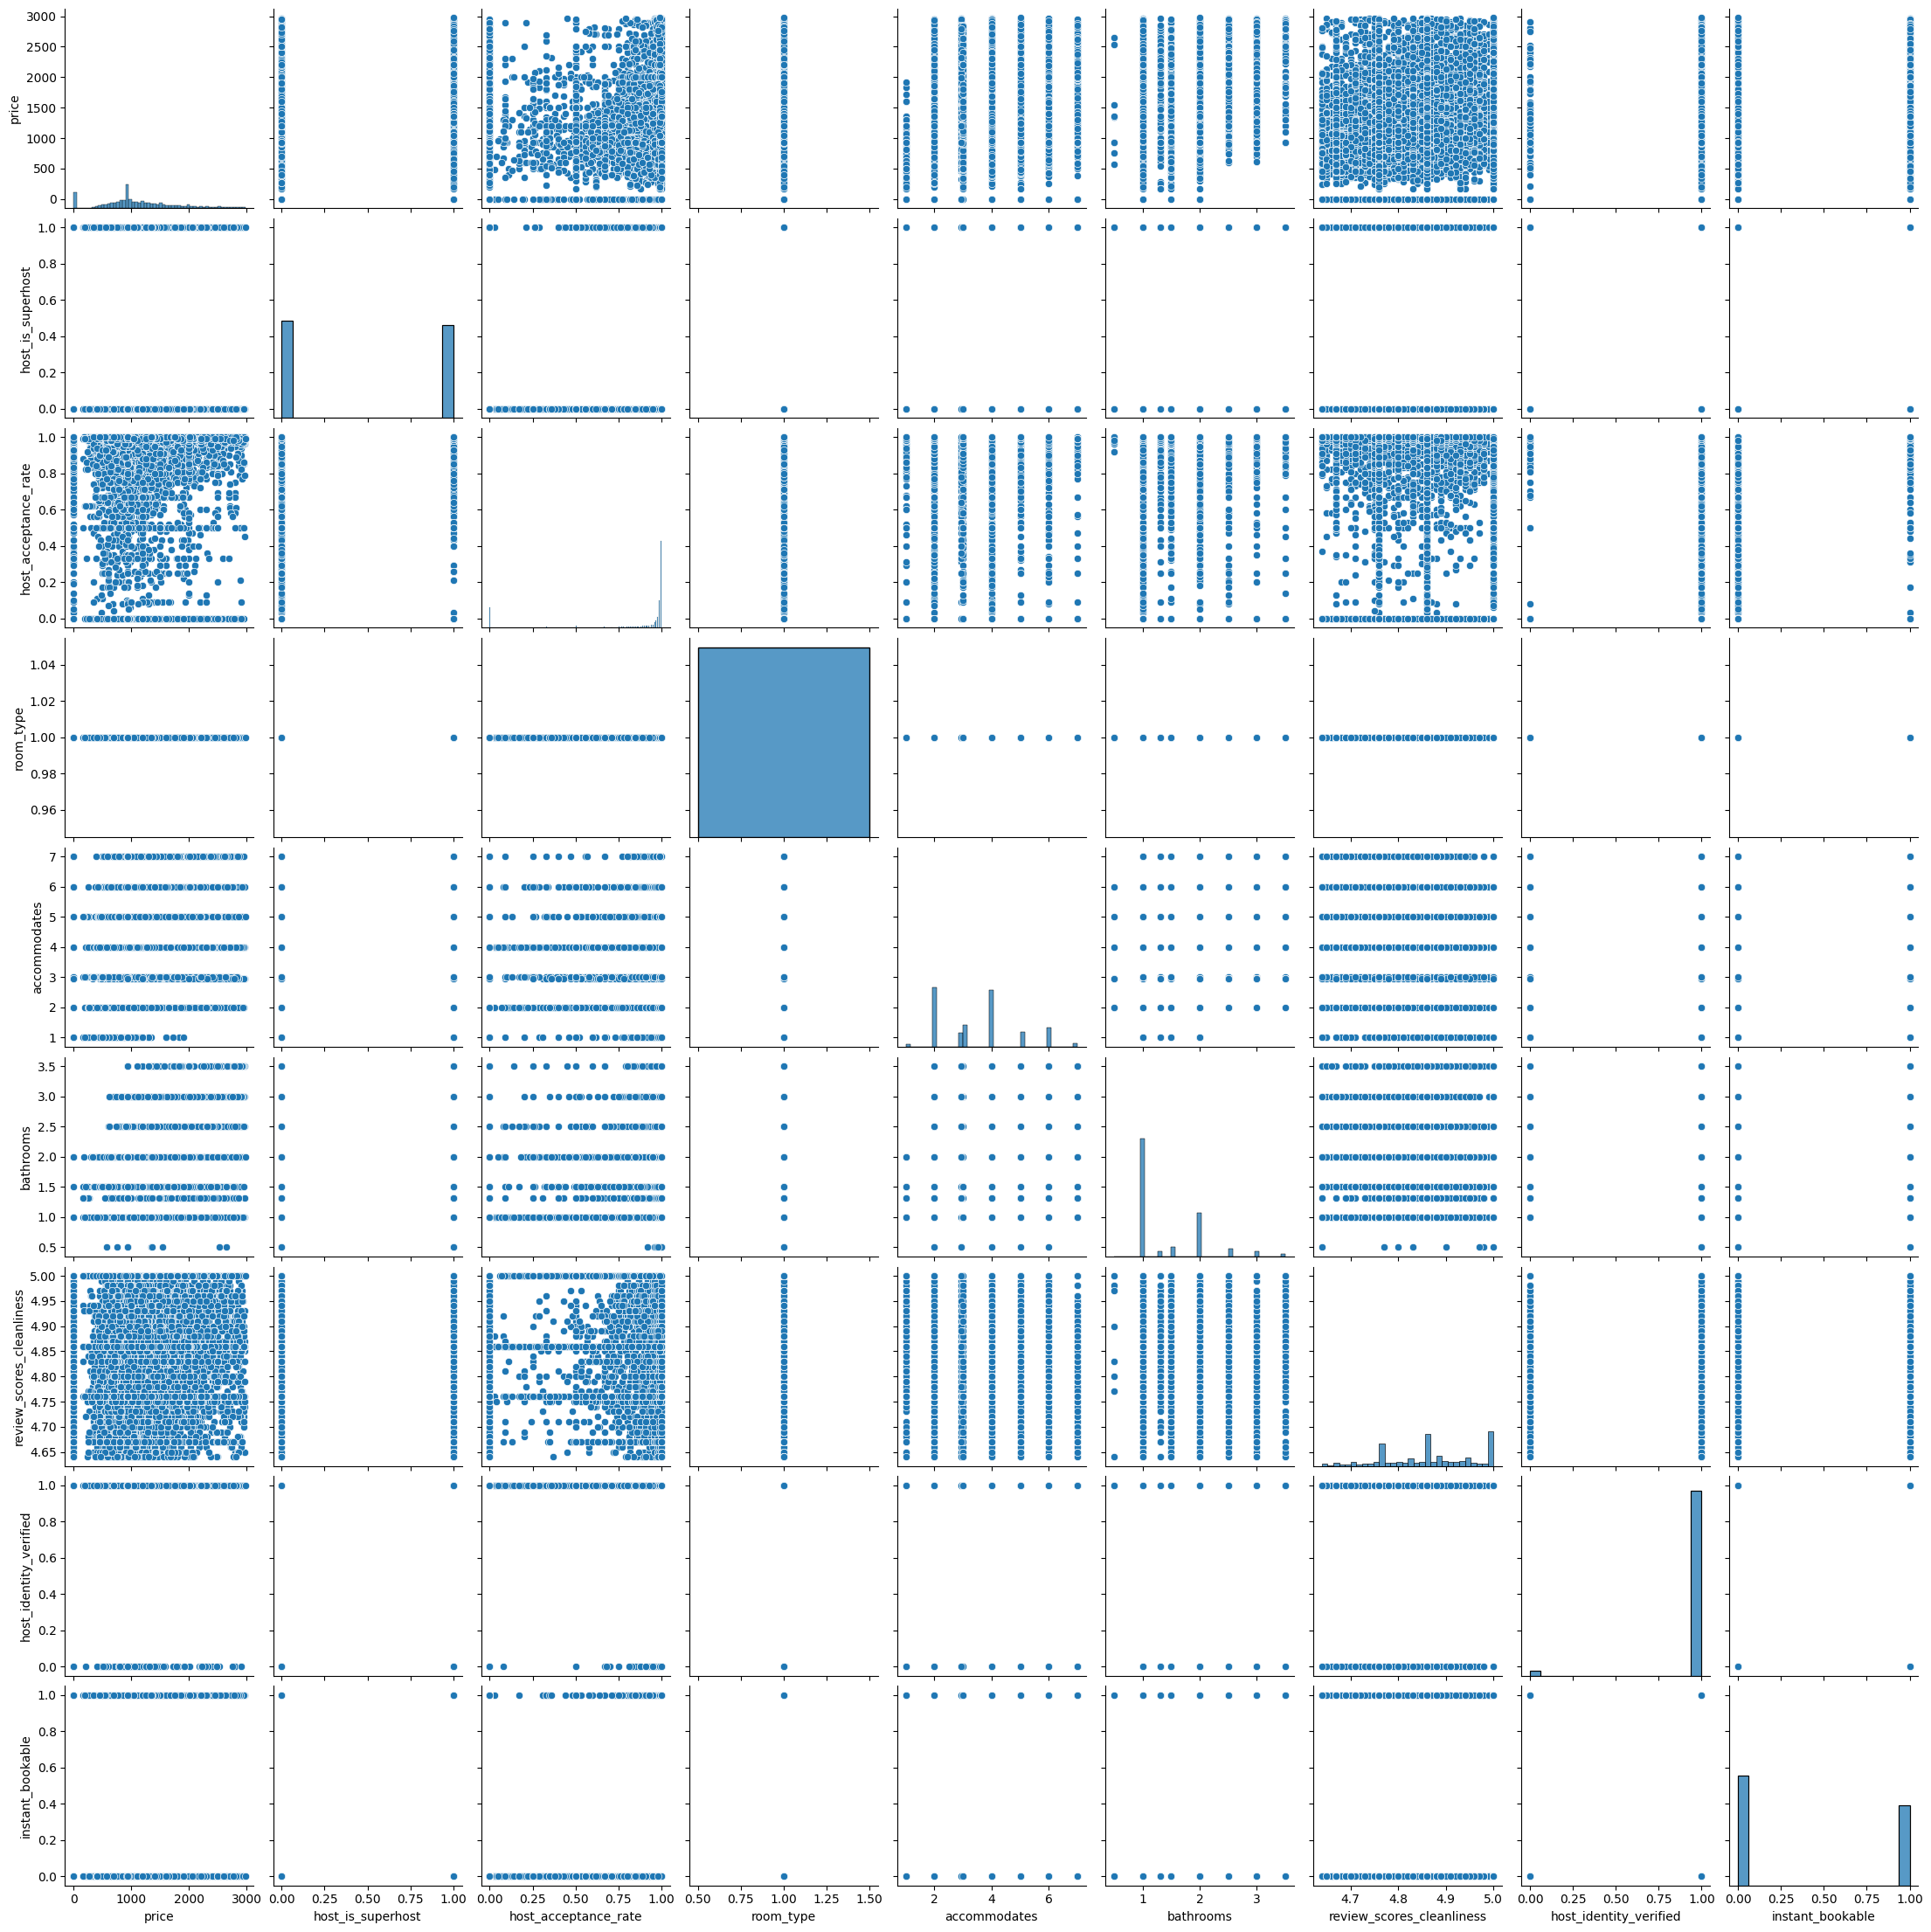

In [90]:
#Graficamos todas las disperciones
sns.pairplot(df)

In [91]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,0.124232,0.203903,NaN,0.194701,0.388683,0.071175,0.154529,0.143512
host_is_superhost,0.124232,1.000000,0.364659,NaN,0.033876,0.070521,0.137384,0.095419,0.061598
host_acceptance_rate,0.203903,0.364659,1.000000,NaN,0.032829,0.045363,0.078985,0.232761,0.287231
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.194701,0.033876,0.032829,NaN,1.000000,0.421591,0.006209,0.019897,-0.009469
bathrooms,0.388683,0.070521,0.045363,NaN,0.421591,1.000000,0.027776,0.068063,0.014264
review_scores_cleanliness,0.071175,0.137384,0.078985,NaN,0.006209,0.027776,1.000000,0.046474,-0.037176
host_identity_verified,0.154529,0.095419,0.232761,NaN,0.019897,0.068063,0.046474,1.000000,0.069063
instant_bookable,0.143512,0.061598,0.287231,NaN,-0.009469,0.014264,-0.037176,0.069063,1.000000


In [92]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,0.124232,0.203903,NaN,0.194701,0.388683,0.071175,0.154529,0.143512
host_is_superhost,0.124232,1.000000,0.364659,NaN,0.033876,0.070521,0.137384,0.095419,0.061598
host_acceptance_rate,0.203903,0.364659,1.000000,NaN,0.032829,0.045363,0.078985,0.232761,0.287231
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.194701,0.033876,0.032829,NaN,1.000000,0.421591,0.006209,0.019897,0.009469
bathrooms,0.388683,0.070521,0.045363,NaN,0.421591,1.000000,0.027776,0.068063,0.014264
review_scores_cleanliness,0.071175,0.137384,0.078985,NaN,0.006209,0.027776,1.000000,0.046474,0.037176
host_identity_verified,0.154529,0.095419,0.232761,NaN,0.019897,0.068063,0.046474,1.000000,0.069063
instant_bookable,0.143512,0.061598,0.287231,NaN,0.009469,0.014264,0.037176,0.069063,1.000000


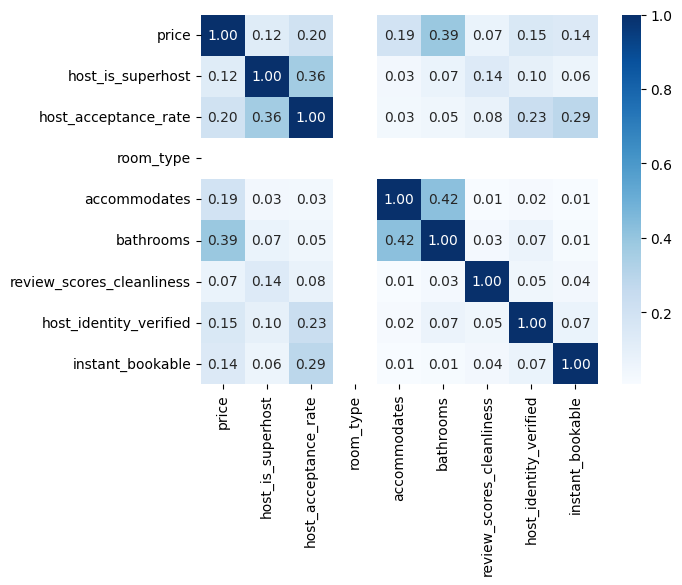

In [93]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Blues', annot=True, fmt=".2f")

Price Vs Host is Superhost

<Axes: xlabel='host_is_superhost', ylabel='price'>

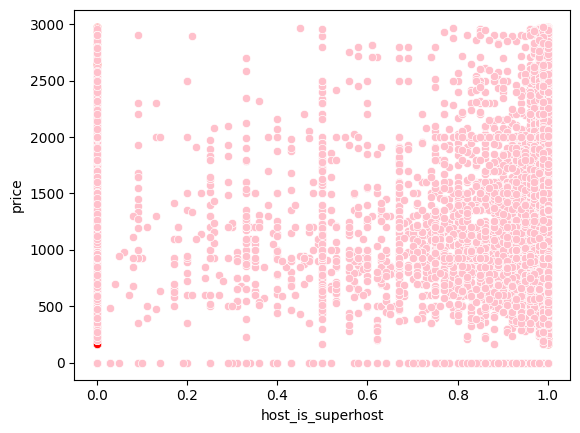

In [94]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='pink',data=df)

In [95]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [96]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [97]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([157.26678612]),
 'rank_': 1,
 'singular_': array([65.87105781]),
 'intercept_': np.float64(1055.453150406503)}

In [98]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.01543357010693358

In [99]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([1055.45315041, 1212.71993652, 1212.71993652, ..., 1055.45315041,
       1212.71993652, 1212.71993652], shape=(17363,))

In [100]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_predic)
df

,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,1055.453150,932.7,0,0.00,1,2.00,1.0,4.76,1,0
1,1212.719937,0.0,1,0.93,1,2.94,1.0,4.70,1,0
2,1212.719937,2029.0,1,0.57,1,4.00,1.0,4.75,1,0
3,1212.719937,1140.0,1,1.00,1,2.00,1.0,4.96,1,0
4,1212.719937,932.7,1,1.00,1,2.00,1.5,5.00,1,0
...,...,...,...,...,...,...,...,...,...,...
17358,1055.453150,700.0,0,0.00,1,4.00,1.0,4.76,1,0
17359,1055.453150,1900.0,0,0.00,1,4.00,2.0,4.76,1,0
17360,1055.453150,1200.0,0,0.00,1,2.00,1.0,4.76,1,0
17361,1212.719937,1358.0,1,1.00,1,3.00,1.0,4.76,1,1


In [101]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.01543357010693358

In [102]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.12423192064414677)

<Axes: xlabel='host_is_superhost', ylabel='price'>

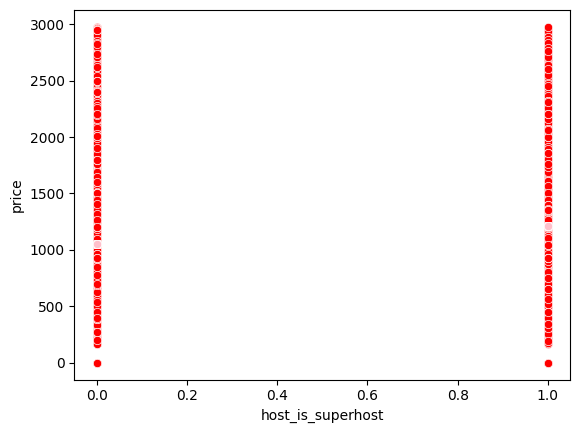

In [103]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost',y='price',color='red',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones1',color='pink',data = df)

Accomodates Vs Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

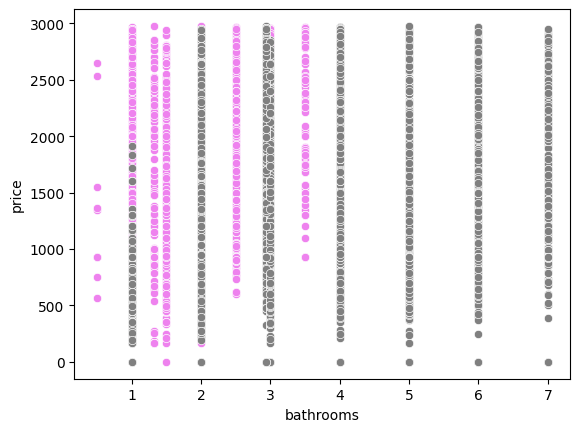

In [104]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='violet',data=df)
sns.scatterplot(x='accommodates',y='price',color='grey',data=df)

In [105]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [106]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [107]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([417.39457498]),
 'rank_': 1,
 'singular_': array([77.65098831]),
 'intercept_': np.float64(548.4641784512286)}

In [108]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.15107432959748468

In [109]:
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([965.85875343, 965.85875343, 965.85875343, ..., 965.85875343,
       965.85875343, 965.85875343], shape=(17363,))

In [110]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_predic)

<Axes: xlabel='bathrooms', ylabel='price'>

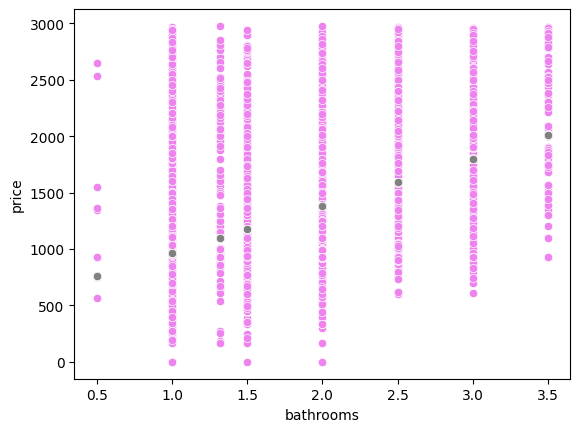

In [111]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms',y='price',color='violet',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones2',color='gray',data = df)

In [112]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.15107432959748468

In [113]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.38868281361218515)

Review_scores_cleanliness vs price

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

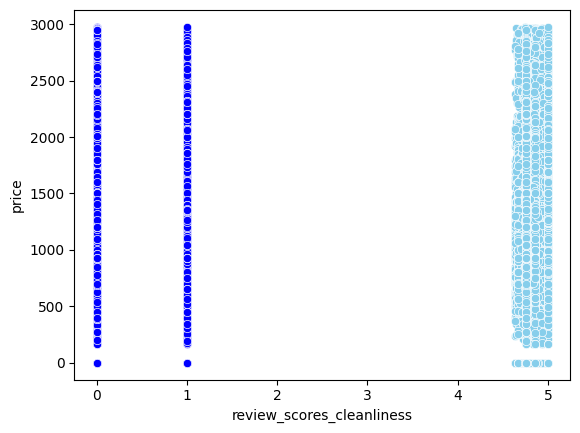

In [114]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)

In [115]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [116]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [117]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([463.71521398]),
 'rank_': 1,
 'singular_': array([12.7989649]),
 'intercept_': np.float64(-1122.5336388086941)}

In [118]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.005065886858989788

In [119]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([1084.75077975, 1056.92786691, 1080.11362761, ..., 1084.75077975,
       1084.75077975, 1084.75077975], shape=(17363,))

In [120]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

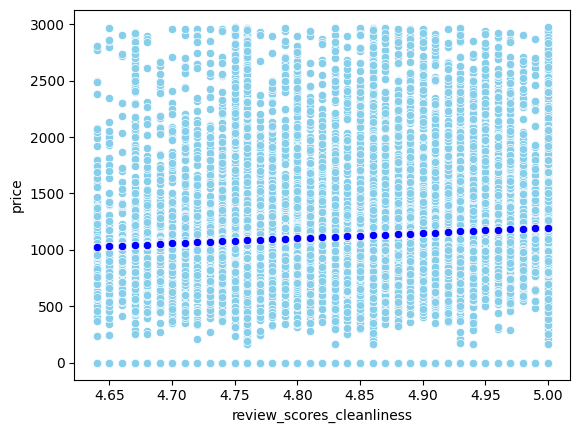

In [121]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='blue',data = df)

In [122]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.005065886858989788

In [123]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.07117504379338159)

price vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

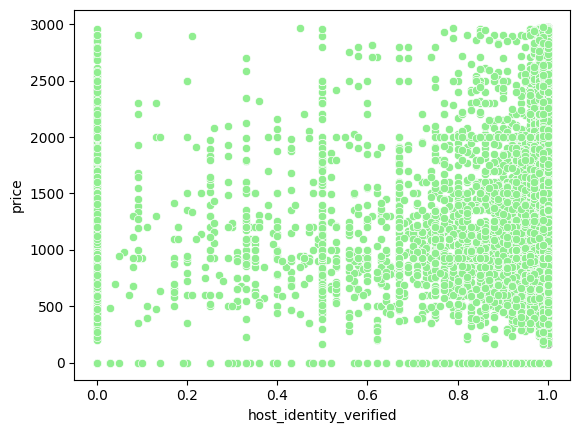

In [124]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='black',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='lightgreen',data=df)

In [125]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [126]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [127]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([627.11573177]),
 'rank_': 1,
 'singular_': array([20.54754994]),
 'intercept_': np.float64(521.0293302540481)}

In [128]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.023879134439843686

In [129]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([1148.14506202, 1148.14506202, 1148.14506202, ..., 1148.14506202,
       1148.14506202, 1148.14506202], shape=(17363,))

In [130]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,1148.145062,1084.750780,965.858753,1055.453150,932.7,0,0.00,1,2.00,1.0,4.76,1,0
1,1148.145062,1056.927867,965.858753,1212.719937,0.0,1,0.93,1,2.94,1.0,4.70,1,0
2,1148.145062,1080.113628,965.858753,1212.719937,2029.0,1,0.57,1,4.00,1.0,4.75,1,0
3,1148.145062,1177.493823,965.858753,1212.719937,1140.0,1,1.00,1,2.00,1.0,4.96,1,0
4,1148.145062,1196.042431,1174.556041,1212.719937,932.7,1,1.00,1,2.00,1.5,5.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17358,1148.145062,1084.750780,965.858753,1055.453150,700.0,0,0.00,1,4.00,1.0,4.76,1,0
17359,1148.145062,1084.750780,1383.253328,1055.453150,1900.0,0,0.00,1,4.00,2.0,4.76,1,0
17360,1148.145062,1084.750780,965.858753,1055.453150,1200.0,0,0.00,1,2.00,1.0,4.76,1,0
17361,1148.145062,1084.750780,965.858753,1212.719937,1358.0,1,1.00,1,3.00,1.0,4.76,1,1


<Axes: xlabel='host_identity_verified', ylabel='price'>

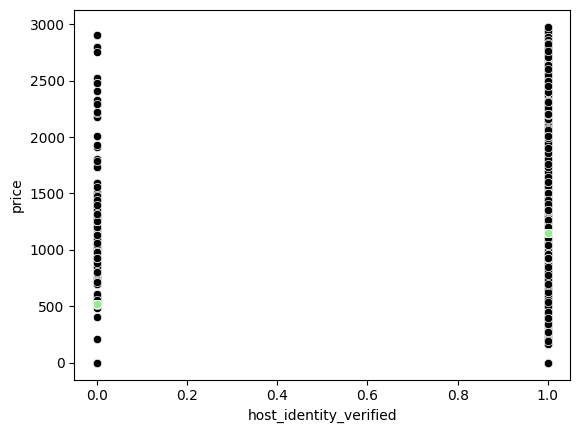

In [131]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified',y='price',color='black',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones4',color='lightgreen',data = df)

In [132]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.023879134439843686

In [133]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.1545287495576266)

price vs instant bookable

<Axes: xlabel='instant_bookable', ylabel='price'>

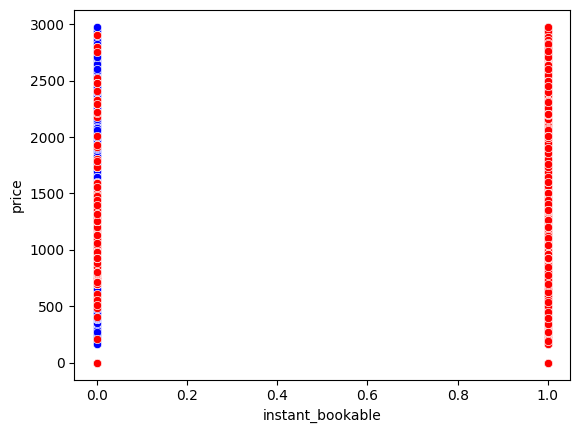

In [134]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [135]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [136]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [137]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([183.94368926]),
 'rank_': 1,
 'singular_': array([65.05823086]),
 'intercept_': np.float64(1055.0532331874238)}

In [138]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.020595739214988362

In [139]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([1055.05323319, 1055.05323319, 1055.05323319, ..., 1055.05323319,
       1238.99692245, 1238.99692245], shape=(17363,))

In [140]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,1055.053233,1148.145062,1084.750780,965.858753,1055.453150,932.7,0,0.00,1,2.00,1.0,4.76,1,0
1,1055.053233,1148.145062,1056.927867,965.858753,1212.719937,0.0,1,0.93,1,2.94,1.0,4.70,1,0
2,1055.053233,1148.145062,1080.113628,965.858753,1212.719937,2029.0,1,0.57,1,4.00,1.0,4.75,1,0
3,1055.053233,1148.145062,1177.493823,965.858753,1212.719937,1140.0,1,1.00,1,2.00,1.0,4.96,1,0
4,1055.053233,1148.145062,1196.042431,1174.556041,1212.719937,932.7,1,1.00,1,2.00,1.5,5.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17358,1055.053233,1148.145062,1084.750780,965.858753,1055.453150,700.0,0,0.00,1,4.00,1.0,4.76,1,0
17359,1055.053233,1148.145062,1084.750780,1383.253328,1055.453150,1900.0,0,0.00,1,4.00,2.0,4.76,1,0
17360,1055.053233,1148.145062,1084.750780,965.858753,1055.453150,1200.0,0,0.00,1,2.00,1.0,4.76,1,0
17361,1238.996922,1148.145062,1084.750780,965.858753,1212.719937,1358.0,1,1.00,1,3.00,1.0,4.76,1,1


<Axes: xlabel='instant_bookable', ylabel='price'>

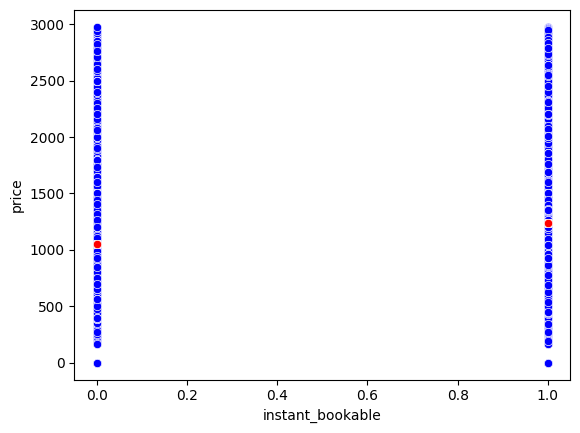

In [141]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

In [142]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.020595739214988362

In [143]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.14351215702855408)